In [1]:
import pandas as pd
import numpy as np

# Data understanding

In [2]:
#loading training.csv data
df=pd.read_csv('training.csv',header=0)
print(df.describe())
print(df.head())

                id       Carats        Depth        Table       Vendor  \
count  8050.000000  8050.000000  6610.000000  5519.000000  8050.000000   
mean   4025.500000     1.265807    61.723374    57.951984     2.050435   
std    2323.979167     0.894574     2.192793     3.051339     0.983876   
min       1.000000     0.400000     0.000000     0.000000     1.000000   
25%    2013.250000     0.700000    61.000000    57.000000     1.000000   
50%    4025.500000     1.040000    62.000000    58.000000     2.000000   
75%    6037.750000     1.510000    62.600000    59.000000     3.000000   
max    8050.000000    11.920000    69.700000    69.000000     4.000000   

              Price        Retail     LogPrice    LogRetail  
count  8.050000e+03  8.050000e+03  8050.000000  8050.000000  
mean   1.508101e+04  2.149478e+04     8.803274     9.127529  
std    3.564261e+04  5.146239e+04     1.225854     1.282771  
min    3.950000e+02  4.500000e+01     5.978886     3.806662  
25%    2.690000e+03  3.

# Feature Engineering & Data Cleaning

In [3]:
#Data prep 1
df['Vendor']=df['Vendor'].astype('str')
df[['length','breadth','height']] = df.Measurements.str.split("x",expand=True)
df = df.drop('Measurements',1)
df['length']=df['length'].astype('float')
df['breadth']=df['breadth'].astype('float')
df['height']=df['height'].astype('float')
df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Polish,Regions,...,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,length,breadth,height
0,1,0.41,NaN,SI1,L,,65.4,False,Very good,Other/Unknown,...,Good,NaN,1,430,850,6.063785,6.745236,4.65,4.62,3.03
1,2,0.42,AGSL,SI2,L,,61.7,False,Excellent,Russia,...,Very good,NaN,1,560,920,6.327937,6.824374,4.85,4.79,2.98
2,3,0.40,AGSL,SI1,L,,64.0,False,Excellent,South Africa,...,Excellent,57.0,1,560,575,6.327937,6.354370,4.66,4.63,2.97
3,4,0.41,AGSL,SI2,L,,62.7,False,Very good,Botswana,...,Very good,58.0,1,560,825,6.327937,6.715383,4.71,4.69,2.95
4,5,0.40,AGSL,SI1,L,,63.0,False,Excellent,Botswana,...,Very good,58.0,1,580,890,6.363028,6.791221,4.71,4.68,2.96


In [4]:
#Data prep 2
df['Symmetry']=df['Symmetry'].replace('Execllent','Excellent')
df['Shape']=df['Shape'].replace('Marquis','Marquise')
df['Shape']=df['Shape'].replace('ROUND','Round')
df['Cut']=df['Cut'].replace(' ',np.nan)
df['Clarity']=df['Clarity'].replace('None',np.nan)
df['Polish']=df['Polish'].replace(' ',np.nan)
df['Symmetry']=df['Symmetry'].replace(' ',np.nan)

# Missing value treatment

In [5]:
#Counting missing values
missing_percents=dict()
for i in range(len(df.columns)):
    missing_percents[df.columns[i]]=round(df[df.columns[i]].isnull().sum() * 100 / len(df),2)
    
missing_percents

{'id': 0.0,
 'Carats': 0.0,
 'Cert': 6.86,
 'Clarity': 0.01,
 'Color': 0.0,
 'Cut': 48.72,
 'Depth': 17.89,
 'Known_Conflict_Diamond': 0.0,
 'Polish': 11.17,
 'Regions': 0.0,
 'Shape': 0.0,
 'Symmetry': 11.17,
 'Table': 31.44,
 'Vendor': 0.0,
 'Price': 0.0,
 'Retail': 0.0,
 'LogPrice': 0.0,
 'LogRetail': 0.0,
 'length': 0.0,
 'breadth': 0.0,
 'height': 0.0}

In [6]:
#understanding variation between categories for Polish feature
[df[df['Polish']=='Excellent']['Retail'].mean(),df[df['Polish']=='Good']['Retail'].mean(),
df[df['Polish']=='Very good']['Retail'].mean(),df[df['Polish'].isnull()]['Retail'].mean(),
df[(df['Polish']=='Excellent')|(df['Polish'].isnull())]['Retail'].mean()]

[26070.01486160134,
 10584.301675977653,
 11586.233480176212,
 13785.289210233594,
 24311.98105698822]

In [7]:
#understanding variation between categories for Symmetry feature
[df[df['Symmetry']=='Excellent']['Retail'].mean(),df[df['Symmetry']=='Faint']['Retail'].mean(),
df[df['Symmetry']=='Fair']['Retail'].mean(),df[df['Symmetry']=='Good']['Retail'].mean(),
df[df['Symmetry']=='Very good']['Retail'].mean(),df[df['Symmetry'].isnull()]['Retail'].mean(),
df[(df['Symmetry']=='Excellent')|(df['Symmetry'].isnull())]['Retail'].mean()]

[27562.92226890756,
 1941.6666666666667,
 8768.4375,
 12217.206632653062,
 12376.378787878788,
 13785.289210233594,
 25374.180067149675]

In [8]:
#Imputing missing values
df['Cert']=df['Cert'].replace(np.nan,df['Cert'].mode()[0])
df['Clarity']=df['Clarity'].replace(np.nan,df['Clarity'].mode()[0])
df['Depth']=df['Depth'].replace(np.nan,df['Depth'].mean())
df['Polish']=df['Polish'].replace(np.nan,df['Polish'].mode()[0])
df['Symmetry']=df['Symmetry'].replace(np.nan,df['Symmetry'].mode()[0])
df['Table']=df['Table'].replace(np.nan,df['Table'].mean())

# Multi-collinearity check

In [9]:
#Creating dummies
df2 = pd.get_dummies(data=df, drop_first=True)

In [10]:
df2.corr()

,id,Carats,Depth,Known_Conflict_Diamond,Table,Price,Retail,LogPrice,LogRetail,length,...,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Very good,Vendor_2,Vendor_3,Vendor_4
id,1.000000,0.331803,-0.079026,0.005683,0.001586,0.188534,0.185597,0.493621,0.455889,0.423590,...,-0.007646,-0.000411,-0.007544,-0.027977,0.033282,0.023050,-0.107992,0.224737,0.104386,0.135400
Carats,0.331803,1.000000,-0.069163,0.005317,0.026871,0.741266,0.716293,0.838805,0.781492,0.949646,...,-0.011146,-0.013416,0.004415,-0.016170,-0.008147,-0.057119,-0.176150,0.431960,0.011713,0.076745
Depth,-0.079026,-0.069163,1.000000,0.015260,0.265426,-0.045766,-0.045155,-0.054664,-0.056933,-0.090851,...,-0.003447,0.003326,-0.000634,-0.026142,0.001646,-0.062657,0.064000,-0.032525,-0.008251,-0.003584
Known_Conflict_Diamond,0.005683,0.005317,0.015260,1.000000,-0.001819,0.007804,-0.074187,0.010207,-0.340468,0.007110,...,0.004192,-0.017848,-0.004326,-0.003858,0.005601,-0.003145,0.004500,0.007375,0.012295,-0.010627
Table,0.001586,0.026871,0.265426,-0.001819,1.000000,0.009991,0.009392,0.021556,0.018966,0.035156,...,0.011911,-0.010507,0.008718,0.015653,0.023715,0.081041,0.013704,-0.004993,0.008070,0.011458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symmetry_Good,0.023050,-0.057119,-0.062657,-0.003145,0.081041,-0.041592,-0.040790,-0.093061,-0.085069,-0.077602,...,0.013581,-0.001592,-0.007161,-0.004368,-0.010097,1.000000,-0.129218,-0.060988,-0.013173,-0.027538
Symmetry_Very good,-0.107992,-0.176150,0.064000,0.004500,0.013704,-0.104747,-0.101203,-0.225513,-0.214447,-0.218513,...,-0.004026,0.002150,0.002750,-0.011028,-0.025488,-0.129218,1.000000,-0.103615,-0.055330,-0.050009
Vendor_2,0.224737,0.431960,-0.032525,0.007375,-0.004993,0.277386,0.281259,0.482226,0.467448,0.480247,...,-0.012455,0.002934,-0.008496,-0.002727,-0.002512,-0.060988,-0.103615,1.000000,-0.327631,-0.309361
Vendor_3,0.104386,0.011713,-0.008251,0.012295,0.008070,-0.053782,-0.048103,0.103319,0.102978,0.078089,...,0.004437,-0.004998,-0.001163,-0.007706,-0.017810,-0.013173,-0.055330,-0.327631,1.000000,-0.150392


In [11]:
l1=df2.describe().columns.to_list()
#Displaying maximum rows 
pd.set_option('display.max_rows',500)
#Displaying float values without scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df2 = df2[l1]
#df2 = df2.drop(['Color'],1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
print(vif_data)

C:\Users\gajav\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                  feature      VIF
0                      id     7.01
1                  Carats   135.50
2                   Depth  3357.41
3                   Table  1267.35
4                   Price    17.86
5                  Retail    15.36
6                LogPrice  4007.19
7               LogRetail   506.96
8                  length 21701.55
9                 breadth 20503.92
10                 height  4578.15
11             Cert_GemEx     1.08
12             Clarity_I1    51.64
13             Clarity_I2     6.09
14             Clarity_I3     1.40
15             Clarity_IF    52.76
16              Clarity_N      inf
17            Clarity_SI1   828.71
18            Clarity_SI2   845.53
19            Clarity_VS1   431.31
20            Clarity_VS2   598.72
21           Clarity_VVS1    91.88
22           Clarity_VVS2   171.52
23                Color_E     2.41
24                Color_F     2.46
25           Color_Fdpink     1.01
26              Color_Fdy      inf
27        Color_Ffcd

In [13]:
#Separating dependent and independent variables
df_x = df.drop(['Cut','Price','Retail','LogPrice','LogRetail'],1)
df_y_price = df['LogPrice']
df_y_retail = df['LogRetail']

In [14]:
#Creating dummies
df_x_dummies = pd.get_dummies(data=df_x, drop_first=True)

In [15]:
#Splitting into train and validation sets
train_x = df_x_dummies.iloc[:7000,1:]
valid_x = df_x_dummies.iloc[7000:,1:]

train_y_price = df_y_price[:7000]
train_y_retail = df_y_retail[:7000]
valid_y_price = df_y_price[7000:]
valid_y_retail = df_y_retail[7000:]

# Linear Regression - Price prediction

In [16]:
import statsmodels.api as sm
#from scipy import stats

X=train_x.to_numpy()
y = train_y_price.to_numpy()
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
lr_model = est.fit()
print(lr_model.summary(xname=['intercept']+list(train_x.columns)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5704.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:48:59   Log-Likelihood:                 2753.5
No. Observations:                7000   AIC:                            -5371.
Df Residuals:                    6932   BIC:                            -4905.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  3

In [17]:
X_valid=valid_x.to_numpy()
X_valid = np.array(X_valid, dtype=float)

X_valid2 = sm.add_constant(X_valid)
price_pred = lr_model.predict(X_valid2)

In [18]:
 # Regression metrics
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_price, price_pred)
mean_absolute_error=metrics.mean_absolute_error(valid_y_price, price_pred) 
mse=metrics.mean_squared_error(valid_y_price, price_pred)
r2=metrics.r2_score(valid_y_price, price_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9735
r2:  0.9727
MAE:  0.1287
RMSE:  0.1961


# Linear Regression - Retail prediction

In [19]:
import statsmodels.api as sm
#from scipy import stats

X=train_x.to_numpy()
y = train_y_retail.to_numpy()
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
lr_model = est.fit()
print(lr_model.summary(xname=['intercept']+list(train_x.columns)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3808.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:55:08   Log-Likelihood:                 1069.9
No. Observations:                7000   AIC:                            -2004.
Df Residuals:                    6932   BIC:                            -1538.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  3

In [20]:
X_valid=valid_x.to_numpy()
X_valid = np.array(X_valid, dtype=float)

X_valid2 = sm.add_constant(X_valid)
retail_pred = lr_model.predict(X_valid2)

In [21]:
 # Regression metrics
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_retail, retail_pred)
mean_absolute_error=metrics.mean_absolute_error(valid_y_retail, retail_pred) 
mse=metrics.mean_squared_error(valid_y_retail, retail_pred) 
r2=metrics.r2_score(valid_y_retail, retail_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9641
r2:  0.9639
MAE:  0.1659
RMSE:  0.2426


# Random Forest - Price prediction

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x,train_y_price)
price_pred_rf = rf.predict(valid_x)

In [23]:
 # Regression metrics
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_price, price_pred_rf)
mean_absolute_error=metrics.mean_absolute_error(valid_y_price, price_pred_rf) 
mse=metrics.mean_squared_error(valid_y_price, price_pred_rf) 
r2=metrics.r2_score(valid_y_price, price_pred_rf)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9744
r2:  0.9738
MAE:  0.1333
RMSE:  0.1922


# Random Forest - Retail prediction

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x,train_y_retail)
retail_pred_rf = rf.predict(valid_x)

In [25]:
 # Regression metrics
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_retail, retail_pred_rf)
mean_absolute_error=metrics.mean_absolute_error(valid_y_retail, retail_pred_rf) 
mse=metrics.mean_squared_error(valid_y_retail, retail_pred_rf) 
r2=metrics.r2_score(valid_y_retail, retail_pred_rf)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9628
r2:  0.9626
MAE:  0.1705
RMSE:  0.2468


# Gradient Boosting - Price prediction

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(train_x,train_y_price)
price_pred_gbr = gbr.predict(valid_x)

In [27]:
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_price, price_pred_gbr)
mean_absolute_error=metrics.mean_absolute_error(valid_y_price, price_pred_gbr) 
mse=metrics.mean_squared_error(valid_y_price, price_pred_gbr) 
r2=metrics.r2_score(valid_y_price, price_pred_gbr)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9707
r2:  0.9679
MAE:  0.1462
RMSE:  0.2127


# Gradient Boosting - Retail prediction

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(train_x,train_y_retail)
retail_pred_gbr = gbr.predict(valid_x)

In [29]:
from sklearn import metrics
explained_variance=metrics.explained_variance_score(valid_y_retail, retail_pred_gbr)
mean_absolute_error=metrics.mean_absolute_error(valid_y_retail, retail_pred_gbr) 
mse=metrics.mean_squared_error(valid_y_retail, retail_pred_gbr) 
r2=metrics.r2_score(valid_y_retail, retail_pred_gbr)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.959
r2:  0.9577
MAE:  0.1835
RMSE:  0.2624


# Train on full data

In [30]:
train_x_full = df_x_dummies.iloc[:,1:]

train_y_price_full = df_y_price[:]
train_y_retail_full = df_y_retail[:]

In [31]:
#Train for Price
X=train_x_full.to_numpy()
y = train_y_price_full.to_numpy()
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
lr_model_price = est.fit()
X_price=lr_model_price.predict(X2)
d1=pd.DataFrame(X_price)
d1.to_csv("X_price.csv")
print(lr_model_price.summary(xname=['intercept']+list(train_x_full.columns)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5691.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:57:38   Log-Likelihood:                 3086.5
No. Observations:                8050   AIC:                            -6019.
Df Residuals:                    7973   BIC:                            -5481.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  2

In [32]:
#Train for Retail
y2 = train_y_retail_full.to_numpy()
y2 = np.array(y2, dtype=float)

est2 = sm.OLS(y2, X2)
lr_model_retail = est2.fit()
#X_retail=lr_model_retail.predict(X2)
#X_retail_df=pd.DataFrame(X_retail)
#X_retail_df.to_csv("X_retail.csv")
print(lr_model_retail.summary(xname=['intercept']+list(train_x_full.columns)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3812.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:57:38   Log-Likelihood:                 1143.4
No. Observations:                8050   AIC:                            -2133.
Df Residuals:                    7973   BIC:                            -1594.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  2

# Test Data Preparation

In [33]:
#loading training.csv data
test_df=pd.read_csv('offers.csv',header=0)
#Data prep 1
test_df['Vendor']=test_df['Vendor'].astype('str')
test_df['Measurements']=test_df['Measurements'].str.replace('*','x')
test_df[['length','breadth','height']] = test_df.Measurements.str.split("x",expand=True)
test_df = test_df.drop('Measurements',1)
test_df['length']=test_df['length'].astype('float')
test_df['breadth']=test_df['breadth'].astype('float')
test_df['height']=test_df['height'].astype('float')
#Data prep 2
test_df['Cut']=test_df['Cut'].replace(' ',np.nan)
test_df['Clarity']=test_df['Clarity'].replace('None',np.nan)
test_df['Polish']=test_df['Polish'].replace(' ',np.nan)
test_df['Symmetry']=test_df['Symmetry'].replace(' ',np.nan)
df['Shape']=df['Shape'].replace('Marquis','Marquise')
df['Shape']=df['Shape'].replace('ROUND','Round')
#Imputing missing values
test_df['Cert']=test_df['Cert'].replace(np.nan,df['Cert'].mode()[0])
test_df['Known_Conflict_Diamond']=test_df['Known_Conflict_Diamond'].replace(np.nan,df['Known_Conflict_Diamond'].mode()[0])
test_df['Clarity']=test_df['Clarity'].replace(np.nan,df['Clarity'].mode()[0])
test_df['Depth']=test_df['Depth'].replace(np.nan,df['Depth'].mean())
test_df['Polish']=test_df['Polish'].replace(np.nan,df['Polish'].mode()[0])
test_df['Symmetry']=test_df['Symmetry'].replace(np.nan,df['Symmetry'].mode()[0])
test_df['Table']=test_df['Table'].replace(np.nan,df['Table'].mean())

<ipython-input-33-3a7d5d958b93>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  test_df['Measurements']=test_df['Measurements'].str.replace('*','x')


In [34]:
test_df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,length,breadth,height
0,8051,0.42,AGSL,SI2,L,NaN,62.70,False,Excellent,Australia,Round,Excellent,57.00,1,NaN,4.81,4.78,3.01
1,8052,0.40,GemEx,VS2,M,NaN,63.80,False,Excellent,Australia,Round,Excellent,59.00,1,NaN,4.64,4.61,2.95
2,8053,0.41,AGSL,SI2,L,NaN,62.20,True,Excellent,DR Congo,Round,Very good,58.00,1,NaN,4.76,4.74,2.95
3,8054,0.40,AGSL,SI1,K,NaN,64.20,False,Very good,Angola,Emerald,Very good,58.00,1,NaN,4.63,4.59,2.96
4,8055,0.40,AGSL,VS2,L,NaN,64.30,False,Excellent,Russia,Round,Very good,57.95,1,NaN,4.67,4.62,2.99


In [35]:
test_x = test_df.drop(['Cut','Offers'],1)
#Creating dummies
test_x_dummies = pd.get_dummies(data=test_x, drop_first=True)
#test_x_dummies.columns

In [36]:
#[df_x_dummies.columns]-[test_x_dummies.columns]
extra_cols = [item for item in list(df_x_dummies.columns) if item not in list(test_x_dummies.columns)]
extra_cols2 = [item for item in list(test_x_dummies.columns) if item not in list(df_x_dummies.columns)]

In [37]:
#21 out of 32 colors are not present and 4 extra are present
for col in extra_cols:
    test_x_dummies[col]=0

test_x_dummies = test_x_dummies.drop(['id']+extra_cols2,1)
len(test_x_dummies.columns)
print(extra_cols)

['Clarity_I1', 'Clarity_N', 'Color_Fdpink', 'Color_Fdy', 'Color_Ffcdbrown', 'Color_Ffcg', 'Color_Ffcly', 'Color_Ffcy', 'Color_Ffg', 'Color_Fiy', 'Color_Fiyellow', 'Color_Fly', 'Color_Flyellow', 'Color_Fvyellow', 'Color_Fyellow', 'Color_Gy', 'Color_Lb', 'Color_O-p', 'Color_P', 'Color_Q-r', 'Color_S', 'Color_U', 'Color_W']


In [38]:
test_x_dummies=test_x_dummies.reindex(train_x.columns.to_list(),axis=1)
X_test = test_x_dummies.to_numpy()
X_test = np.array(X_test, dtype=float)
X_test2 = sm.add_constant(X_test)
price_predicted = lr_model_price.predict(X_test2)
retail_predicted = lr_model_retail.predict(X_test2)

In [39]:
import math
final_df=pd.read_csv('offers.csv',header=0)
final_df['p1'] = price_predicted
final_df['r1'] = retail_predicted
final_df['price_predicted']=final_df['p1'].apply(lambda x: math.exp(x))
final_df['retail_predicted']=final_df['r1'].apply(lambda x: math.exp(x))
#final_df[['price_predicted','p1']]
#final_df.to_csv('predicted.csv')

In [43]:
#final_df.to_csv('predicted2.csv')

# Optimization

In [40]:
from pulp import *
prob = pulp.LpProblem('Profit', LpMaximize)

In [41]:
#creating binary variable for each row
final_vars=[]
for i in range(len(final_df)):
    #defining each row as one x and its number 
    var=str('x'+str(i))
    #defining each variable  
    var=pulp.LpVariable(var,lowBound =0, upBound=1, cat="Integer")
    final_vars.append(var)
len(final_vars)

2683

In [42]:
#creating budget constraint
total_offers=""
for i in range(len(final_vars)):
    formula=final_df.loc[i,'price_predicted']*final_vars[i]
    total_offers+=formula
prob+=(total_offers <= 5000000)

In [43]:
#creating objective function, which is sum of profit from each row
obj=""
for i in range(len(final_vars)):
    formula=(final_df.loc[i,'retail_predicted']-final_df.loc[i,'price_predicted'])*final_vars[i]
    obj+=formula
prob +=obj

In [44]:
#solving for objective function with constraint
prob.solve()

1

In [45]:
#Writing decision to buy and offer price to csv
Offers_df = final_df.drop(['Offers','p1','r1'],1)
decision=[]
for v in prob.variables():
    decision.append(int(v.varValue))
Offers_df['decision']=decision
for i in range(len(Offers_df)):
    Offers_df.loc[i,'Offers']=Offers_df.loc[i,'price_predicted']*Offers_df.loc[i,'decision']
Offers_df.to_csv('Offers_solved.csv',index=False)

In [47]:
print("Total Profit: ", value(prob.objective))

Total Profit:  3175402.5808039233


In [48]:
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  3175402.5808039233
Individual decision_variables: 
x0 = 1.0
x1 = 1.0
x10 = 0.0
x100 = 1.0
x1000 = 1.0
x1001 = 0.0
x1002 = 1.0
x1003 = 0.0
x1004 = 0.0
x1005 = 1.0
x1006 = 0.0
x1007 = 1.0
x1008 = 0.0
x1009 = 0.0
x101 = 1.0
x1010 = 1.0
x1011 = 1.0
x1012 = 0.0
x1013 = 1.0
x1014 = 0.0
x1015 = 0.0
x1016 = 0.0
x1017 = 0.0
x1018 = 0.0
x1019 = 0.0
x102 = 1.0
x1020 = 0.0
x1021 = 0.0
x1022 = 1.0
x1023 = 0.0
x1024 = 1.0
x1025 = 0.0
x1026 = 0.0
x1027 = 0.0
x1028 = 0.0
x1029 = 0.0
x103 = 0.0
x1030 = 0.0
x1031 = 1.0
x1032 = 0.0
x1033 = 0.0
x1034 = 0.0
x1035 = 0.0
x1036 = 0.0
x1037 = 0.0
x1038 = 1.0
x1039 = 1.0
x104 = 1.0
x1040 = 0.0
x1041 = 0.0
x1042 = 0.0
x1043 = 0.0
x1044 = 0.0
x1045 = 0.0
x1046 = 0.0
x1047 = 0.0
x1048 = 1.0
x1049 = 0.0
x105 = 1.0
x1050 = 1.0
x1051 = 0.0
x1052 = 1.0
x1053 = 1.0
x1054 = 0.0
x1055 = 0.0
x1056 = 0.0
x1057 = 0.0
x1058 = 1.0
x1059 = 0.0
x106 = 0.0
x1060 = 0.0
x1061 = 0.0
x1062 = 0.0
x1063 = 0.0
x1064 = 0.0
x1065 = 0.0
x1

x2086 = 1.0
x2087 = 0.0
x2088 = 0.0
x2089 = 0.0
x209 = 1.0
x2090 = 1.0
x2091 = 1.0
x2092 = 0.0
x2093 = 0.0
x2094 = 0.0
x2095 = 1.0
x2096 = 0.0
x2097 = 1.0
x2098 = 0.0
x2099 = 0.0
x21 = 0.0
x210 = 1.0
x2100 = 1.0
x2101 = 1.0
x2102 = 1.0
x2103 = 1.0
x2104 = 0.0
x2105 = 0.0
x2106 = 1.0
x2107 = 1.0
x2108 = 0.0
x2109 = 0.0
x211 = 0.0
x2110 = 0.0
x2111 = 1.0
x2112 = 1.0
x2113 = 1.0
x2114 = 0.0
x2115 = 0.0
x2116 = 0.0
x2117 = 0.0
x2118 = 0.0
x2119 = 0.0
x212 = 0.0
x2120 = 0.0
x2121 = 0.0
x2122 = 0.0
x2123 = 0.0
x2124 = 0.0
x2125 = 1.0
x2126 = 1.0
x2127 = 0.0
x2128 = 0.0
x2129 = 1.0
x213 = 0.0
x2130 = 0.0
x2131 = 1.0
x2132 = 1.0
x2133 = 0.0
x2134 = 0.0
x2135 = 0.0
x2136 = 1.0
x2137 = 1.0
x2138 = 1.0
x2139 = 0.0
x214 = 1.0
x2140 = 0.0
x2141 = 0.0
x2142 = 0.0
x2143 = 1.0
x2144 = 0.0
x2145 = 0.0
x2146 = 0.0
x2147 = 0.0
x2148 = 0.0
x2149 = 0.0
x215 = 1.0
x2150 = 1.0
x2151 = 0.0
x2152 = 0.0
x2153 = 0.0
x2154 = 1.0
x2155 = 1.0
x2156 = 1.0
x2157 = 1.0
x2158 = 1.0
x2159 = 0.0
x216 = 1.0
x2160 = 0.0
x2

# Short answer problems

In [49]:
# Estimating difference in diamond feature with Vendors
from sklearn.feature_selection import chi2
cols = ['Cert','Clarity','Color','Known_Conflict_Diamond','Polish','Regions','Shape','Symmetry']
for col in cols:    
    chi2_val, p_val = chi2(np.array(df['Vendor']).reshape(-1, 1), np.array(df[col]).reshape(-1, 1))
    print(col+": "+str(p_val))

Cert: [0.78926194]
Clarity: [0.00578928]
Color: [0.00061683]
Known_Conflict_Diamond: [0.92203874]
Polish: [4.50965928e-22]
Regions: [0.44521405]
Shape: [0.92435816]
Symmetry: [2.85229786e-22]


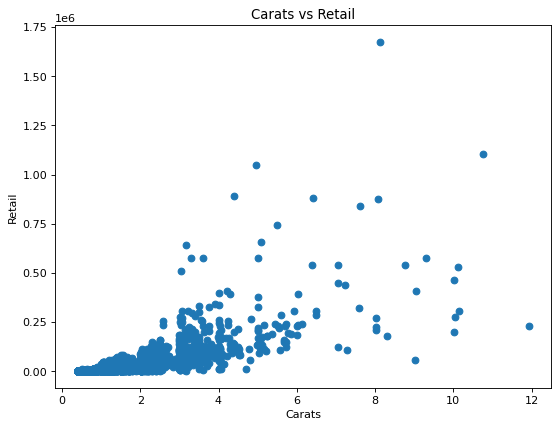

In [50]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Carats vs Retail")
plt.xlabel("Carats")
plt.ylabel("Retail")
#plt.xticks(rotation=90)
plt.scatter(df['Carats'],df['Retail'])

In [51]:
df[['Carats','Retail']].corr()

,Carats,Retail
Carats,1.00,0.72
Retail,0.72,1.00


In [52]:
df['Carats_sq']=[i*i for i in df['Carats']]
df[['Carats_sq','Retail']].corr()

,Carats_sq,Retail
Carats_sq,1.00,0.72
Retail,0.72,1.00


In [53]:
df['Carats_exp']=df['Carats'].apply(lambda x: math.exp(x))
df[['Carats_exp','Retail']].corr()

,Carats_exp,Retail
Carats_exp,1.00,0.20
Retail,0.20,1.00
